# Analyse COVID-19

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
run ./COVID_fetch_data.ipynb

remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Total 58 (delta 25), reused 25 (delta 25), pack-reused 33
Unpacking objects: 100% (58/58), done.
From https://github.com/CSSEGISandData/COVID-19
 * branch            master     -> FETCH_HEAD
   a4ccce6..42ded9f  master     -> origin/master
Updating a4ccce6..42ded9f
Fast-forward
 README.md                                          |    1 +
 csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv   | 3558 ++++++++++++++++++++
 .../csse_covid_19_daily_reports/03-30-2020.csv     | 3440 +++++++++++++++++++
 .../csse_covid_19_daily_reports/03-31-2020.csv     | 2435 ++++++++++++++
 .../csse_covid_19_time_series/README.md            |    2 +
 .../time_series_covid19_confirmed_US.csv           | 3254 ++++++++++++++++++
 .../time_series_covid19_confirmed_global.csv       |  511 +--
 .../time_series_covid19_deaths_US.csv              | 3254 ++++++++++++++++++
 .../time_series_covid19_deaths_global.csv          | 

## Fetching calculated data

In [3]:
df_dataset = pd.read_csv('dataset.csv', index_col=0)

In [4]:
df_dataset

,country,date,case,death,population,density,size,ratio,ratio_death,start_date,start_death_date,age,age_death
70.0,Albania,2020-01-22,0.0,0.0,2877.800,105.029197,27400.0,0.000000,0.000000,2020-03-12,2020-03-30,-50.0,-68.0
71.0,Albania,2020-01-23,0.0,0.0,2877.800,105.029197,27400.0,0.000000,0.000000,2020-03-12,2020-03-30,-49.0,-67.0
72.0,Albania,2020-01-24,0.0,0.0,2877.800,105.029197,27400.0,0.000000,0.000000,2020-03-12,2020-03-30,-48.0,-66.0
73.0,Albania,2020-01-25,0.0,0.0,2877.800,105.029197,27400.0,0.000000,0.000000,2020-03-12,2020-03-30,-47.0,-65.0
74.0,Albania,2020-01-26,0.0,0.0,2877.800,105.029197,27400.0,0.000000,0.000000,2020-03-12,2020-03-30,-46.0,-64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12106.0,United Kingdom,2020-03-28,17312.0,1021.0,67886.004,280.601844,241930.0,25.501575,1.503992,2020-03-10,2020-03-14,18.0,14.0
12107.0,United Kingdom,2020-03-29,19780.0,1231.0,67886.004,280.601844,241930.0,29.137081,1.813334,2020-03-10,2020-03-14,19.0,15.0
12108.0,United Kingdom,2020-03-30,22453.0,1411.0,67886.004,280.601844,241930.0,33.074564,2.078484,2020-03-10,2020-03-14,20.0,16.0
12109.0,United Kingdom,2020-03-31,25481.0,1793.0,67886.004,280.601844,241930.0,37.534983,2.641192,2020-03-10,2020-03-14,21.0,17.0


## Filtering the countries

In [5]:
filtered_countries = ['China','US','France', 'Italy','Spain','Germany','South Korea', 'Japan', 'Netherlands']

In [6]:
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6']

# Dynamics

In [7]:
df_dynamics = df_dataset[['country','ratio_death','age_death']]

In [8]:
df_dynamics_t = df_dynamics.pivot(index='age_death',columns='country',values='ratio_death')

In [9]:
df_dynamics_plot = df_dynamics_t.loc[range(-5,50),filtered_countries]

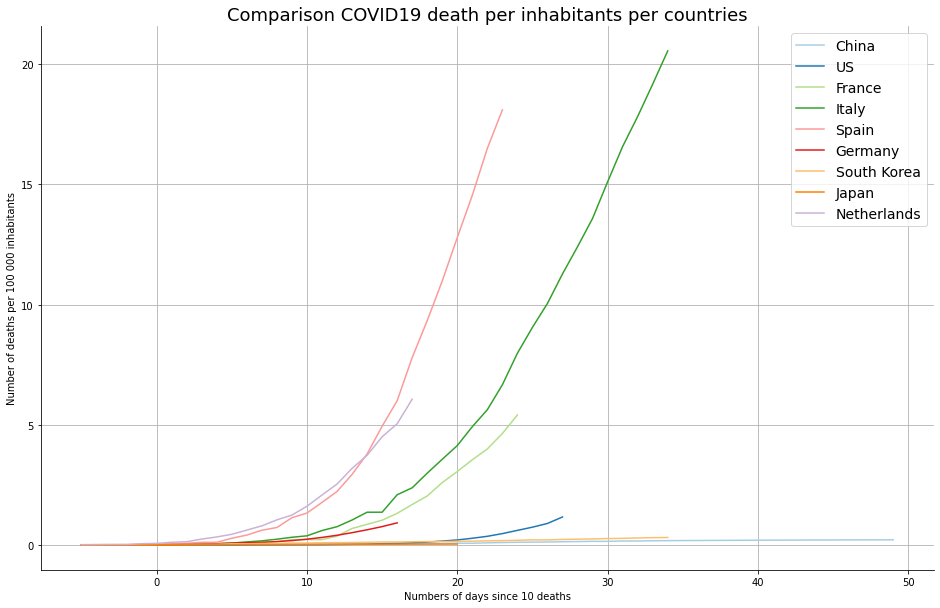

In [10]:
ax=df_dynamics_plot.plot(kind='line', figsize=(16,10), color=colors)
plt.title("Comparison COVID19 death per inhabitants per countries", fontsize=18)
plt.xlabel("Numbers of days since 10 deaths")
plt.ylabel("Number of deaths per 100 000 inhabitants")
plt.legend(fontsize=14)
plt.grid()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("death_ratio.png")
plt.show() 

In [11]:
df_dynamics_vol = df_dataset[['country','death','age_death']]

In [12]:
df_dynamics_vol_t = df_dynamics_vol.pivot(index='age_death',columns='country',values='death')
df_dynamics_vol_plot = df_dynamics_vol_t.loc[range(-5,50),filtered_countries]

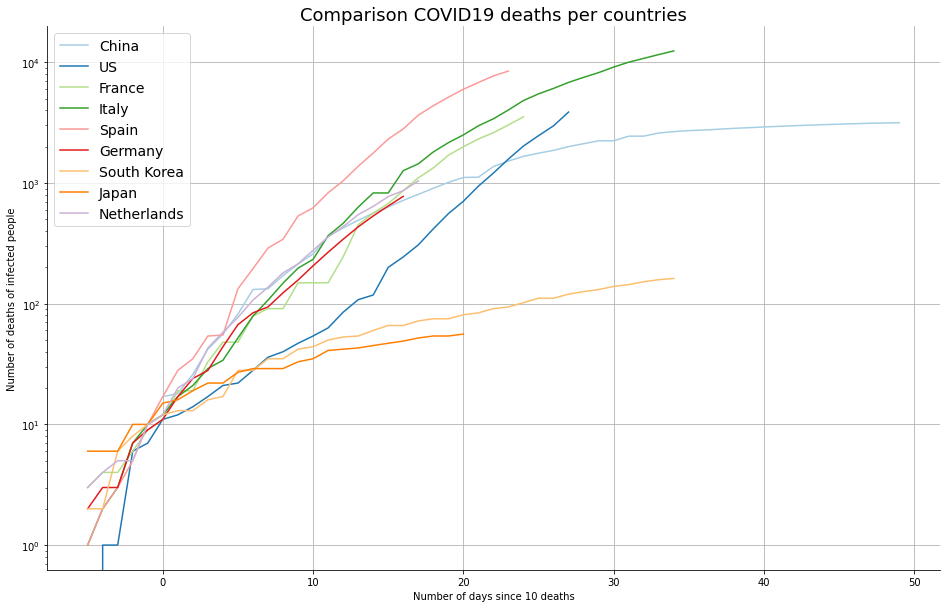

In [13]:
ax_vol=df_dynamics_vol_plot.plot(kind='line', figsize=(16,10), color= colors)
plt.title("Comparison COVID19 deaths per countries", fontsize=18)
plt.xlabel("Number of days since 10 deaths")
plt.ylabel("Number of deaths of infected people")
plt.legend(fontsize=14)
plt.grid()
ax_vol.spines['top'].set_visible(False)
ax_vol.spines['right'].set_visible(False)
ax_vol.set_yscale('log')
plt.savefig("death.png")
plt.show() 

### Derivates of ratio

In [14]:
df_dynamics_plot_deriv = df_dynamics_vol_plot.diff()

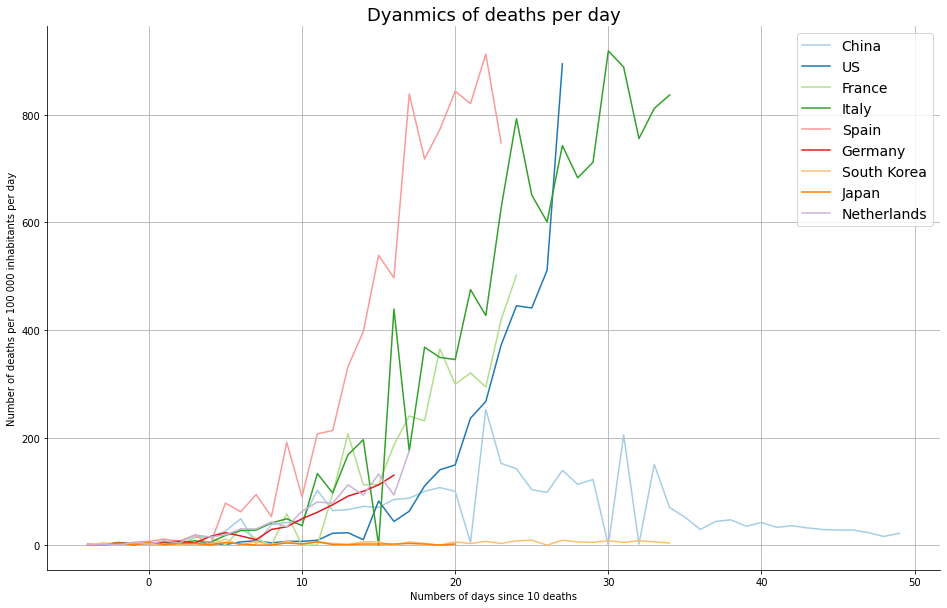

In [15]:
ax_deriv=df_dynamics_plot_deriv.plot(kind='line', figsize=(16,10), color=colors)
plt.title("Dyanmics of deaths per day", fontsize=18)
plt.xlabel("Numbers of days since 10 deaths")
plt.ylabel("Number of deaths per 100 000 inhabitants per day")
plt.legend(fontsize=14)
plt.grid()
ax_deriv.spines['top'].set_visible(False)
ax_deriv.spines['right'].set_visible(False)
plt.savefig("death_ratio_derivative.png")
plt.show() 

## Cases

In [16]:
df_dynamics_cases = df_dataset[['country','ratio','age']].pivot(index='age',columns='country',values='ratio')

In [17]:
df_dynamics_cases_plot = df_dynamics_cases.loc[range(-5,40),filtered_countries]

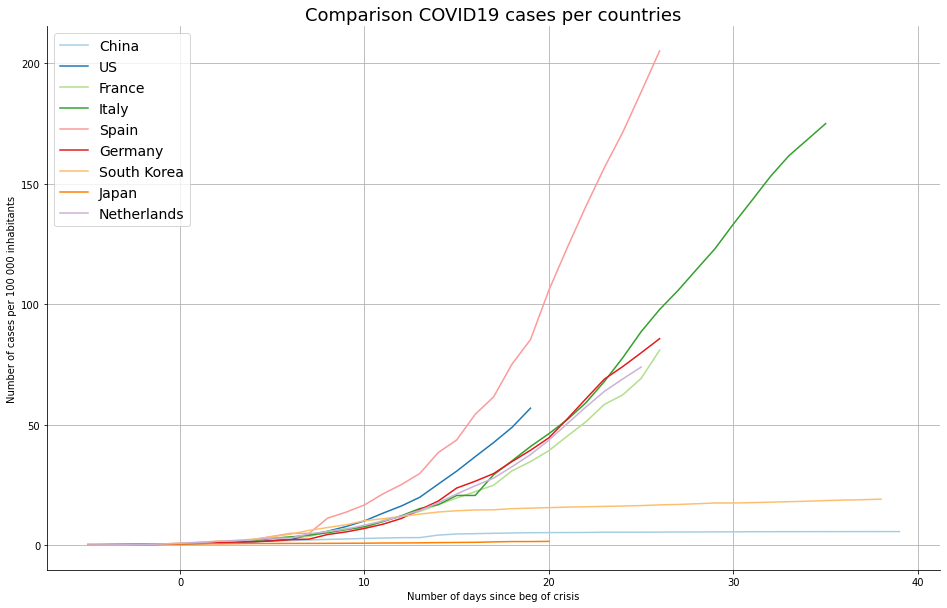

In [18]:
ax_cases=df_dynamics_cases_plot.plot(kind='line', figsize=(16,10), color=colors)
plt.title("Comparison COVID19 cases per countries", fontsize=18)
plt.xlabel("Number of days since beg of crisis")
plt.ylabel("Number of cases per 100 000 inhabitants")
plt.legend(fontsize=14)
plt.grid()
ax_cases.spines['top'].set_visible(False)
ax_cases.spines['right'].set_visible(False)
plt.savefig("cases.png")
plt.show() 

## Death rate
Should be stable

In [19]:
df_dataset['DR']=df_dataset['death']/df_dataset['case']

In [20]:
df_death_rate_pivot = df_dataset[['country','age_death', 'DR']].pivot(index='age_death',columns='country',values='DR').loc[range(0,50),filtered_countries]

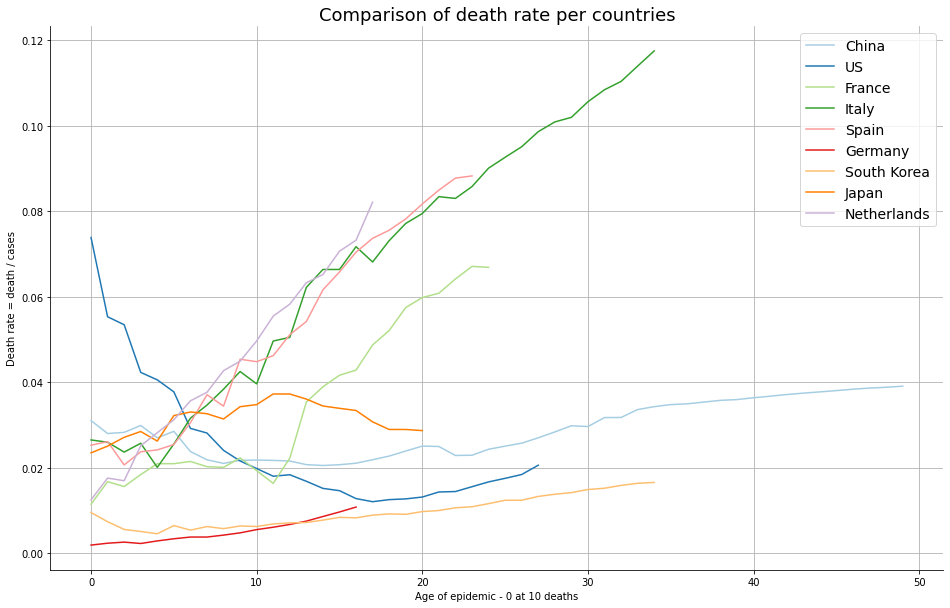

In [21]:
ax_vol=df_death_rate_pivot.plot(kind='line', figsize=(16,10), color= colors)
plt.title("Comparison of death rate per countries", fontsize=18)
plt.xlabel("Age of epidemic - 0 at 10 deaths")
plt.ylabel("Death rate = death / cases")
plt.legend(fontsize=14)
plt.grid()
ax_vol.spines['top'].set_visible(False)
ax_vol.spines['right'].set_visible(False)
plt.savefig("death_rate.png")
plt.show() 

## Number of infected people in France

In [22]:
age_max_fr = df_dataset[df_dataset['country'] =='France']['age_death'].max()

### Focus

In [23]:
df_dynamics_plot2 = df_dynamics_t.loc[range(-5,50),['France','Italy','Spain','United Kingdom','Netherlands']]

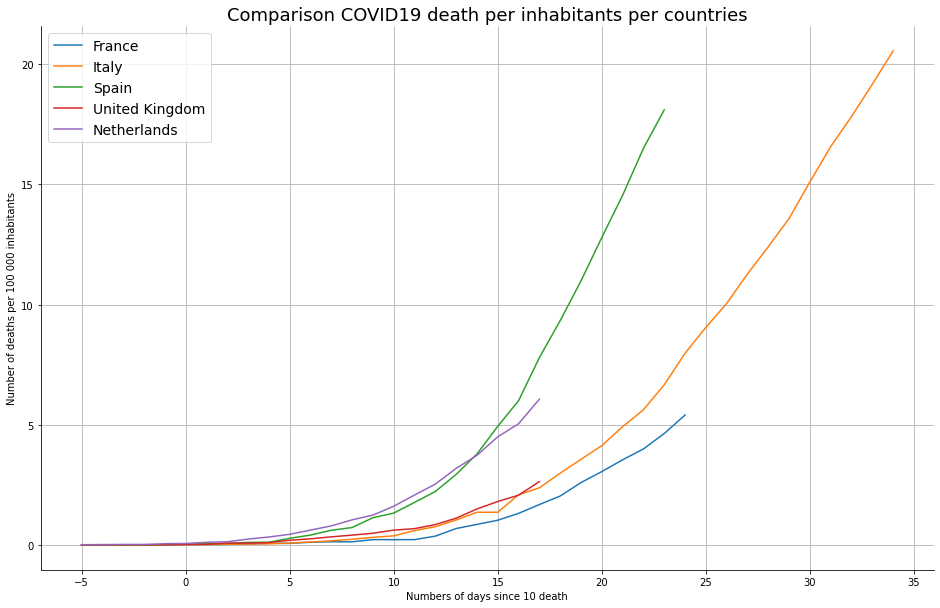

In [24]:
ax2=df_dynamics_plot2.plot(kind='line', figsize=(16,10))
plt.title("Comparison COVID19 death per inhabitants per countries", fontsize=18)
plt.xlabel("Numbers of days since 10 death")
plt.ylabel("Number of deaths per 100 000 inhabitants")
plt.legend(fontsize=14)
plt.grid()
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.savefig("death_ratio.png")
plt.show() 